In [71]:
import pandas as pd
import numpy as np

In [72]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as sw
import re
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist 
import matplotlib.pyplot as plt
import datetime
import math
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [73]:
data=pd.read_csv('Assignment_1_data')

In [74]:
data.head(5)

,DATE,TIME,UNIQUE_STORY_INDEX,EVENT_TYPE,PNAC,STORY_DATE_TIME,TAKE_DATE_TIME,HEADLINE_ALERT_TEXT,ACCUMULATED_STORY_TEXT,TAKE_TEXT,PRODUCTS,TOPICS,RELATED_RICS,NAMED_ITEMS,HEADLINE_SUBTYPE,STORY_TYPE,TABULAR_FLAG,ATTRIBUTION,LANGUAGE
0,2013-06-01,00:00:00.704,20130601000000nASA05F0W,ALERT,nASA05F0W,2013-06-01 00:00:00,2013-06-01 00:00:00,MERCATOR MINERALS ANNOUNCES SENIOR MANAGEMENT ...,NaN,NaN,E U CAN,MNGISS BACT MET BMAT MIN MINE MTAL CMPNY CA AM...,ML.TO,NaN,NaN,S,False,RTRS,EN
1,2013-06-01,00:00:00.885,20130601000001nS6N0A8042,ALERT,nS6N0A8042,2013-06-01 00:00:01,2013-06-01 00:00:01,S.KOREA SAYS MAY TRADE BALANCE AT PROVISIONAL ...,NaN,NaN,M D T E C MTL GRO SOF O,EMRG KR MCE ECI NEWS TRD ASIA TRACC LEN RTRS,KRIMGR=ECI KRTBAL=ECI 0#KRCOMP1=KQ KREXGR=ECI ...,NaN,NaN,S,False,RTRS,EN
2,2013-06-01,00:00:01.052,20130501000000nEAP51Z100,DELETE,nEAP51Z100,2013-05-01 00:00:00,2013-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-06-01,00:00:01.052,20130601000000nEAP51Z100,HEADLINE,nEAP51Z100,2013-06-01 00:00:00,2013-06-01 00:00:00,"Test, Please Ignore -- EMEA -- 06/01 00:00",NaN,NaN,TEST,AGA LEN RTRS,NaN,NaN,2.0,S,False,RTRS,EN
4,2013-06-01,00:00:01.055,20130601000000nEAP51Z100,STORY_TAKE_OVERWRITE,nEAP51Z100,2013-06-01 00:00:00,NaN,"Test, Please Ignore -- EMEA -- 06/01 00:00",NaN,"Test, Please Ignore -- EMEA -- 06/01 00:00",TEST,AGA LEN RTRS,NaN,NaN,NaN,S,False,RTRS,EN


In [75]:
data.dtypes

DATE                       object
TIME                       object
UNIQUE_STORY_INDEX         object
EVENT_TYPE                 object
PNAC                       object
STORY_DATE_TIME            object
TAKE_DATE_TIME             object
HEADLINE_ALERT_TEXT        object
ACCUMULATED_STORY_TEXT     object
TAKE_TEXT                  object
PRODUCTS                   object
TOPICS                     object
RELATED_RICS               object
NAMED_ITEMS                object
HEADLINE_SUBTYPE          float64
STORY_TYPE                 object
TABULAR_FLAG               object
ATTRIBUTION                object
LANGUAGE                   object
dtype: object

HEADLINE_ALERT_TEXT	 
TOPICS
RELATED_RICS


In [76]:
data.isnull().mean()*100

DATE                       0.000000
TIME                       0.000000
UNIQUE_STORY_INDEX         0.000000
EVENT_TYPE                 0.000000
PNAC                       0.000000
STORY_DATE_TIME            0.000000
TAKE_DATE_TIME            40.611337
HEADLINE_ALERT_TEXT       10.225999
ACCUMULATED_STORY_TEXT    95.805855
TAKE_TEXT                 59.389848
PRODUCTS                  10.127656
TOPICS                    10.127656
RELATED_RICS              64.069072
NAMED_ITEMS               75.822348
HEADLINE_SUBTYPE          63.128298
STORY_TYPE                10.127656
TABULAR_FLAG              10.127656
ATTRIBUTION               10.127656
LANGUAGE                  10.127656
dtype: float64

In [77]:
data.shape

(421993, 19)

# EDA

In [78]:
data['HEADLINE_ALERT_TEXT'].isnull().sum()

43153

In [79]:
data = data.dropna(subset=['HEADLINE_ALERT_TEXT'])

In [80]:
data['STORY_DATE_TIME'] = pd.to_datetime(data['STORY_DATE_TIME']).dt.date

In [81]:
data.head()

,DATE,TIME,UNIQUE_STORY_INDEX,EVENT_TYPE,PNAC,STORY_DATE_TIME,TAKE_DATE_TIME,HEADLINE_ALERT_TEXT,ACCUMULATED_STORY_TEXT,TAKE_TEXT,PRODUCTS,TOPICS,RELATED_RICS,NAMED_ITEMS,HEADLINE_SUBTYPE,STORY_TYPE,TABULAR_FLAG,ATTRIBUTION,LANGUAGE
0,2013-06-01,00:00:00.704,20130601000000nASA05F0W,ALERT,nASA05F0W,2013-06-01,2013-06-01 00:00:00,MERCATOR MINERALS ANNOUNCES SENIOR MANAGEMENT ...,NaN,NaN,E U CAN,MNGISS BACT MET BMAT MIN MINE MTAL CMPNY CA AM...,ML.TO,NaN,NaN,S,False,RTRS,EN
1,2013-06-01,00:00:00.885,20130601000001nS6N0A8042,ALERT,nS6N0A8042,2013-06-01,2013-06-01 00:00:01,S.KOREA SAYS MAY TRADE BALANCE AT PROVISIONAL ...,NaN,NaN,M D T E C MTL GRO SOF O,EMRG KR MCE ECI NEWS TRD ASIA TRACC LEN RTRS,KRIMGR=ECI KRTBAL=ECI 0#KRCOMP1=KQ KREXGR=ECI ...,NaN,NaN,S,False,RTRS,EN
3,2013-06-01,00:00:01.052,20130601000000nEAP51Z100,HEADLINE,nEAP51Z100,2013-06-01,2013-06-01 00:00:00,"Test, Please Ignore -- EMEA -- 06/01 00:00",NaN,NaN,TEST,AGA LEN RTRS,NaN,NaN,2.0,S,False,RTRS,EN
4,2013-06-01,00:00:01.055,20130601000000nEAP51Z100,STORY_TAKE_OVERWRITE,nEAP51Z100,2013-06-01,NaN,"Test, Please Ignore -- EMEA -- 06/01 00:00",NaN,"Test, Please Ignore -- EMEA -- 06/01 00:00",TEST,AGA LEN RTRS,NaN,NaN,NaN,S,False,RTRS,EN
5,2013-06-01,00:00:01.112,20130601000000nASA05F0X,ALERT,nASA05F0X,2013-06-01,2013-06-01 00:00:00,MERCATOR MINERALS ANNOUNCES SENIOR MANAGEMENT ...,NaN,NaN,E U CAN,MNGISS BACT MET BMAT MIN MINE MTAL CMPNY CA AM...,ML.TO,NaN,NaN,S,False,RTRS,EN


In [82]:
data1=pd.DataFrame([data.groupby("STORY_DATE_TIME")["HEADLINE_ALERT_TEXT"].apply(list)])

In [83]:
data1=data1.T.reset_index()

In [84]:
data1 = data1.dropna(subset=['HEADLINE_ALERT_TEXT'])

In [85]:
data1.shape

(31, 2)

In [86]:
data1.head(5)

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT
0,2013-05-31,[Mile-wide tornado touches down west of Oklaho...
1,2013-06-01,[MERCATOR MINERALS ANNOUNCES SENIOR MANAGEMENT...
2,2013-06-02,"[Test, Please Ignore -- AMERS -- 06/01 20:00, ..."
3,2013-06-03,"[글로벌 과잉유동성 문제, 경각심 가질 필요 - 김중수 한은 총재, 개별적 출구전략..."
4,2013-06-04,"[台灣已公布經濟指標--2013/6/4, 台灣已公布經濟指標--2013/6/4, 台灣經..."


### To lowercase

In [87]:
data1['HEADLINE_ALERT_TEXT']=data1['HEADLINE_ALERT_TEXT'].map(lambda x: str(x).lower())

In [88]:
data1.head()

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT
0,2013-05-31,['mile-wide tornado touches down west of oklah...
1,2013-06-01,['mercator minerals announces senior managemen...
2,2013-06-02,"['test, please ignore -- amers -- 06/01 20:00'..."
3,2013-06-03,"['글로벌 과잉유동성 문제, 경각심 가질 필요 - 김중수 한은 총재', '개별적 출..."
4,2013-06-04,"['台灣已公布經濟指標--2013/6/4', '台灣已公布經濟指標--2013/6/4',..."


In [89]:
data1['HEADLINE_ALERT_TEXT']

0     ['mile-wide tornado touches down west of oklah...
1     ['mercator minerals announces senior managemen...
2     ['test, please ignore -- amers -- 06/01 20:00'...
3     ['글로벌 과잉유동성 문제, 경각심 가질 필요 - 김중수 한은 총재', '개별적 출...
4     ['台灣已公布經濟指標--2013/6/4', '台灣已公布經濟指標--2013/6/4',...
5     ['台灣已公布經濟指標--2013/6/5', '台灣已公布經濟指標--2013/6/5',...
6     ['專欄節選：熱錢涌全球--股市將成唯一出路--今周刊「老謝開講」', '專欄節選：熱錢涌全...
7     ['台灣已公布經濟指標--2013/6/7', '台灣已公布經濟指標--2013/6/7',...
8     ['test, please ignore -- emea -- 06/08 00:00',...
9     ['test, please ignore -- amers -- 06/08 20:00'...
10    ['台灣經濟指標預測--6月10日至8月20日', '台灣經濟指標預測--6月10日至8月2...
11    ['《日本央行焦點》可能考慮供應兩年期低利資金，以抑制市場波動', '台灣貨幣市場：6月11...
12    ['diary - vietnam', 'diary - vietnam', 'test, ...
13    ['台灣經濟指標預測--6月13日至8月20日', '台灣經濟指標預測--6月13日至8月2...
14    ['台灣已公布經濟指標--2013/6/14', '台灣已公布經濟指標--2013/6/14...
15    ['sob pressão, premiê grego propõe retomar tra...
16    ['test, please ignore -- amers -- 06/15 20:00'...
17    ['factbox-speakers at reuters global techn

In [90]:
data1['HEADLINE_TEXT']=data1['HEADLINE_ALERT_TEXT']

In [91]:
data1.head(2)

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT,HEADLINE_TEXT
0,2013-05-31,['mile-wide tornado touches down west of oklah...,['mile-wide tornado touches down west of oklah...
1,2013-06-01,['mercator minerals announces senior managemen...,['mercator minerals announces senior managemen...


In [92]:
data1['HEADLINE_TEXT']=data1['HEADLINE_TEXT'].apply(lambda x: re.sub(r'[^a-zA-Z ]+','',str(x)))

In [93]:
data1.head(2)

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT,HEADLINE_TEXT
0,2013-05-31,['mile-wide tornado touches down west of oklah...,milewide tornado touches down west of oklahoma...
1,2013-06-01,['mercator minerals announces senior managemen...,mercator minerals announces senior management ...


In [94]:
data1.shape

(31, 3)

### Tokenize

In [95]:
tok=word_tokenize(data1.iloc[1]['HEADLINE_TEXT'])

In [96]:
tok

['mercator',
 'minerals',
 'announces',
 'senior',
 'management',
 'changes',
 'skorea',
 'says',
 'may',
 'trade',
 'balance',
 'at',
 'provisional',
 'bln',
 'vs',
 'revised',
 'bln',
 'in',
 'april',
 'test',
 'please',
 'ignore',
 'emea',
 'test',
 'please',
 'ignore',
 'emea',
 'mercator',
 'minerals',
 'announces',
 'senior',
 'management',
 'changes',
 'skorea',
 'says',
 'may',
 'exports',
 'pct',
 'vs',
 'yr',
 'earlier',
 'reuters',
 'poll',
 'pct',
 'test',
 'please',
 'ignore',
 'amers',
 'test',
 'please',
 'ignore',
 'amers',
 'test',
 'please',
 'ignore',
 'apac',
 'skorea',
 'says',
 'may',
 'imports',
 'pct',
 'vs',
 'yr',
 'earlier',
 'reuters',
 'poll',
 'pct',
 'skorea',
 'may',
 'avg',
 'exports',
 'per',
 'working',
 'day',
 'bln',
 'vs',
 'revised',
 'bln',
 'in',
 'aprilreuters',
 'calculations',
 'test',
 'please',
 'ignore',
 'apac',
 'star',
 'buffet',
 'inc',
 'sells',
 'real',
 'estate',
 'onu',
 'pede',
 'grbretanha',
 'que',
 'investigue',
 'torturas',
 '

In [97]:
word_tok=[]
for i in range(0,len(data1)):
    #word_tok=[]
    tok=word_tokenize(data1.iloc[i]['HEADLINE_TEXT'])
    word_tok.append(tok)
data1['Tokens']=word_tok

In [98]:
#word_tok=[]
#for i in range(0,4):
    #word_tok=[]
 #   tok=word_tokenize(data1.iloc[i]['HEADLINE_TEXT'])
  #  print(tok)
# data1['Tokens']=word_tok

In [99]:
data1.tail(3)

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT,HEADLINE_TEXT,Tokens
28,2013-06-28,"['台灣貨幣市場：6月28日及本提存期資金預期變化一覽表', '台灣貨幣市場：6月28日及本...",diary vietnam tablebangladesh key...,"[diary, vietnam, tablebangladesh, key, economi..."
29,2013-06-29,['table-bangladesh key economic indicators - j...,tablebangladesh key economic indicators june ...,"[tablebangladesh, key, economic, indicators, j..."
30,2013-06-30,"['test, please ignore -- amers -- 06/29 20:00'...",test please ignore amers test please ignor...,"[test, please, ignore, amers, test, please, ig..."


In [100]:
data1.head(3)

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT,HEADLINE_TEXT,Tokens
0,2013-05-31,['mile-wide tornado touches down west of oklah...,milewide tornado touches down west of oklahoma...,"[milewide, tornado, touches, down, west, of, o..."
1,2013-06-01,['mercator minerals announces senior managemen...,mercator minerals announces senior management ...,"[mercator, minerals, announces, senior, manage..."
2,2013-06-02,"['test, please ignore -- amers -- 06/01 20:00'...",test please ignore amers test please ignor...,"[test, please, ignore, amers, test, please, ig..."


In [101]:
 data1['Tokens']

0     [milewide, tornado, touches, down, west, of, o...
1     [mercator, minerals, announces, senior, manage...
2     [test, please, ignore, amers, test, please, ig...
3     [hsbc, pmi, hsbc, pmi, diary, vietnam, diary, ...
4     [diary, vietnam, diary, vietnam, test, please,...
5     [diary, vietnam, diary, vietnam, dallas, feds,...
6     [diary, vietnam, diary, vietnam, test, please,...
7     [diary, vietnam, diary, vietnam, test, please,...
8     [test, please, ignore, emea, test, please, ign...
9     [test, please, ignore, amers, test, please, ig...
10    [diary, vietnam, diary, vietnam, advisorychina...
11    [test, please, ignore, emea, test, please, ign...
12    [diary, vietnam, diary, vietnam, test, please,...
13    [diary, vietnam, diary, vietnam, test, please,...
14    [diary, vietnam, diary, vietnam, test, please,...
15    [sob, presso, premi, grego, prope, retomar, tr...
16    [test, please, ignore, amers, test, please, ig...
17    [factboxspeakers, at, reuters, global, tec

### Stopwords

In [102]:
stopwordsEng = sw.words('English') 
stopwordsEng

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [103]:
data1['Without Stopwords']= 0

In [104]:
s_w=[]
for i in range(0,len(data1)):
    ai_tokens_wo_stopwords=[]
    for word in data1.iloc[i]['Tokens']:
        if not word in stopwordsEng:
            ai_tokens_wo_stopwords.append(word)
    s_w.append(ai_tokens_wo_stopwords)
#     print(ai_tokens_wo_stopwords)
data1['Without Stopwords'] = s_w
        
       

In [105]:
data1.tail()

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT,HEADLINE_TEXT,Tokens,Without Stopwords
26,2013-06-26,"['台灣貨幣市場：6月26日及本提存期資金預期變化一覽表', '台灣經濟指標預測--6月26...",diary vietnam test please ignore e...,"[diary, vietnam, test, please, ignore, emea, d...","[diary, vietnam, test, please, ignore, emea, d..."
27,2013-06-27,"['重溫稿-路透調查：台灣央行料連續第八季維持利率不變', '重溫稿-路透調查：台灣央行料連...",test please ignore emea tab...,"[test, please, ignore, emea, tablebangladesh, ...","[test, please, ignore, emea, tablebangladesh, ..."
28,2013-06-28,"['台灣貨幣市場：6月28日及本提存期資金預期變化一覽表', '台灣貨幣市場：6月28日及本...",diary vietnam tablebangladesh key...,"[diary, vietnam, tablebangladesh, key, economi...","[diary, vietnam, tablebangladesh, key, economi..."
29,2013-06-29,['table-bangladesh key economic indicators - j...,tablebangladesh key economic indicators june ...,"[tablebangladesh, key, economic, indicators, j...","[tablebangladesh, key, economic, indicators, j..."
30,2013-06-30,"['test, please ignore -- amers -- 06/29 20:00'...",test please ignore amers test please ignor...,"[test, please, ignore, amers, test, please, ig...","[test, please, ignore, amers, test, please, ig..."


In [106]:
data1.loc[1,'Without Stopwords']

['mercator',
 'minerals',
 'announces',
 'senior',
 'management',
 'changes',
 'skorea',
 'says',
 'may',
 'trade',
 'balance',
 'provisional',
 'bln',
 'vs',
 'revised',
 'bln',
 'april',
 'test',
 'please',
 'ignore',
 'emea',
 'test',
 'please',
 'ignore',
 'emea',
 'mercator',
 'minerals',
 'announces',
 'senior',
 'management',
 'changes',
 'skorea',
 'says',
 'may',
 'exports',
 'pct',
 'vs',
 'yr',
 'earlier',
 'reuters',
 'poll',
 'pct',
 'test',
 'please',
 'ignore',
 'amers',
 'test',
 'please',
 'ignore',
 'amers',
 'test',
 'please',
 'ignore',
 'apac',
 'skorea',
 'says',
 'may',
 'imports',
 'pct',
 'vs',
 'yr',
 'earlier',
 'reuters',
 'poll',
 'pct',
 'skorea',
 'may',
 'avg',
 'exports',
 'per',
 'working',
 'day',
 'bln',
 'vs',
 'revised',
 'bln',
 'aprilreuters',
 'calculations',
 'test',
 'please',
 'ignore',
 'apac',
 'star',
 'buffet',
 'inc',
 'sells',
 'real',
 'estate',
 'onu',
 'pede',
 'grbretanha',
 'que',
 'investigue',
 'torturas',
 'iraque',
 'e',
 'afeg

In [107]:
len(ai_tokens_wo_stopwords)

13941

In [108]:
data1.head()

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT,HEADLINE_TEXT,Tokens,Without Stopwords
0,2013-05-31,['mile-wide tornado touches down west of oklah...,milewide tornado touches down west of oklahoma...,"[milewide, tornado, touches, down, west, of, o...","[milewide, tornado, touches, west, oklahoma, c..."
1,2013-06-01,['mercator minerals announces senior managemen...,mercator minerals announces senior management ...,"[mercator, minerals, announces, senior, manage...","[mercator, minerals, announces, senior, manage..."
2,2013-06-02,"['test, please ignore -- amers -- 06/01 20:00'...",test please ignore amers test please ignor...,"[test, please, ignore, amers, test, please, ig...","[test, please, ignore, amers, test, please, ig..."
3,2013-06-03,"['글로벌 과잉유동성 문제, 경각심 가질 필요 - 김중수 한은 총재', '개별적 출...",...,"[hsbc, pmi, hsbc, pmi, diary, vietnam, diary, ...","[hsbc, pmi, hsbc, pmi, diary, vietnam, diary, ..."
4,2013-06-04,"['台灣已公布經濟指標--2013/6/4', '台灣已公布經濟指標--2013/6/4',...",diary vietnam diary vietnam test ple...,"[diary, vietnam, diary, vietnam, test, please,...","[diary, vietnam, diary, vietnam, test, please,..."


In [109]:
data1['Without Stopwords']

0     [milewide, tornado, touches, west, oklahoma, c...
1     [mercator, minerals, announces, senior, manage...
2     [test, please, ignore, amers, test, please, ig...
3     [hsbc, pmi, hsbc, pmi, diary, vietnam, diary, ...
4     [diary, vietnam, diary, vietnam, test, please,...
5     [diary, vietnam, diary, vietnam, dallas, feds,...
6     [diary, vietnam, diary, vietnam, test, please,...
7     [diary, vietnam, diary, vietnam, test, please,...
8     [test, please, ignore, emea, test, please, ign...
9     [test, please, ignore, amers, test, please, ig...
10    [diary, vietnam, diary, vietnam, advisorychina...
11    [test, please, ignore, emea, test, please, ign...
12    [diary, vietnam, diary, vietnam, test, please,...
13    [diary, vietnam, diary, vietnam, test, please,...
14    [diary, vietnam, diary, vietnam, test, please,...
15    [sob, presso, premi, grego, prope, retomar, tr...
16    [test, please, ignore, amers, test, please, ig...
17    [factboxspeakers, reuters, global, technol

lemmatization

In [110]:
lem = WordNetLemmatizer()

In [111]:
def lemm(x):
    tempList = []
    for word in x:
        tempList.append(lem.lemmatize(word, pos='n'))
    return tempList

data1['Lemmatize']= data1['Without Stopwords'].map(lambda x: lemm(x))

In [112]:
data1.head(3)

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT,HEADLINE_TEXT,Tokens,Without Stopwords,Lemmatize
0,2013-05-31,['mile-wide tornado touches down west of oklah...,milewide tornado touches down west of oklahoma...,"[milewide, tornado, touches, down, west, of, o...","[milewide, tornado, touches, west, oklahoma, c...","[milewide, tornado, touch, west, oklahoma, cit..."
1,2013-06-01,['mercator minerals announces senior managemen...,mercator minerals announces senior management ...,"[mercator, minerals, announces, senior, manage...","[mercator, minerals, announces, senior, manage...","[mercator, mineral, announces, senior, managem..."
2,2013-06-02,"['test, please ignore -- amers -- 06/01 20:00'...",test please ignore amers test please ignor...,"[test, please, ignore, amers, test, please, ig...","[test, please, ignore, amers, test, please, ig...","[test, please, ignore, amers, test, please, ig..."


Frequency

In [113]:
def freq(x):
    mydict={}
    fdist_lem = FreqDist()
    for word in x:
        fdist_lem[word] +=1
        #mydict[word]=fdist_lem[word]
       
    return dict(fdist_lem.most_common(10))

data1['Frequency']=data1['Lemmatize'].map(lambda x: freq(x))

In [114]:
data1.head(3)

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT,HEADLINE_TEXT,Tokens,Without Stopwords,Lemmatize,Frequency
0,2013-05-31,['mile-wide tornado touches down west of oklah...,milewide tornado touches down west of oklahoma...,"[milewide, tornado, touches, down, west, of, o...","[milewide, tornado, touches, west, oklahoma, c...","[milewide, tornado, touch, west, oklahoma, cit...","{'milewide': 2, 'tornado': 2, 'touch': 2, 'wes..."
1,2013-06-01,['mercator minerals announces senior managemen...,mercator minerals announces senior management ...,"[mercator, minerals, announces, senior, manage...","[mercator, minerals, announces, senior, manage...","[mercator, mineral, announces, senior, managem...","{'test': 308, 'please': 300, 'ignore': 300, 'u..."
2,2013-06-02,"['test, please ignore -- amers -- 06/01 20:00'...",test please ignore amers test please ignor...,"[test, please, ignore, amers, test, please, ig...","[test, please, ignore, amers, test, please, ig...","[test, please, ignore, amers, test, please, ig...","{'test': 308, 'please': 298, 'ignore': 298, 'd..."


In [115]:
text_df=data1[['STORY_DATE_TIME','Frequency']]

In [116]:
text_df.shape

(31, 2)

In [117]:
text_df.head(10)

,STORY_DATE_TIME,Frequency
0,2013-05-31,"{'milewide': 2, 'tornado': 2, 'touch': 2, 'wes..."
1,2013-06-01,"{'test': 308, 'please': 300, 'ignore': 300, 'u..."
2,2013-06-02,"{'test': 308, 'please': 298, 'ignore': 298, 'd..."
3,2013-06-03,"{'news': 1725, 'top': 1597, 'de': 1412, 'u': 9..."
4,2013-06-04,"{'news': 1649, 'top': 1567, 'de': 1352, 'share..."
5,2013-06-05,"{'de': 1572, 'news': 1562, 'top': 1487, 'u': 9..."
6,2013-06-06,"{'news': 1699, 'de': 1631, 'top': 1605, 'u': 8..."
7,2013-06-07,"{'news': 1550, 'top': 1518, 'de': 1438, 'u': 9..."
8,2013-06-08,"{'test': 335, 'ignore': 310, 'please': 306, 'd..."
9,2013-06-09,"{'test': 336, 'please': 304, 'ignore': 304, 'd..."


In [118]:
# text_df = text_df[:50]

In [119]:
text_df=pd.concat([text_df.drop('Frequency',axis=1), text_df["Frequency"].apply(pd.Series)], axis=1)

In [120]:
text_df.head()

,STORY_DATE_TIME,milewide,tornado,touch,west,oklahoma,city,report,briefaffymax,end,...,fed,order,imbalance,side,nyse,sell,buy,snowden,service,see
0,2013-05-31,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
text_df=text_df.fillna(0)

In [122]:
text_df.head()

,STORY_DATE_TIME,milewide,tornado,touch,west,oklahoma,city,report,briefaffymax,end,...,fed,order,imbalance,side,nyse,sell,buy,snowden,service,see
0,2013-05-31,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-06-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-06-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-06-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
columns=text_df.columns

In [124]:
columns

Index(['STORY_DATE_TIME', 'milewide', 'tornado', 'touch', 'west', 'oklahoma',
       'city', 'report', 'briefaffymax', 'end', 'supply', 'test', 'please',
       'ignore', 'update', 'de', 'alert', 'en', 'top', 'page', 'result',
       'news', 'u', 'share', 'pct', 'say', 'may', 'reuters', 'price', 'china',
       'emea', 'apac', 'amers', 'june', 'iran', 'la', 'fed', 'order',
       'imbalance', 'side', 'nyse', 'sell', 'buy', 'snowden', 'service',
       'see'],
      dtype='object')

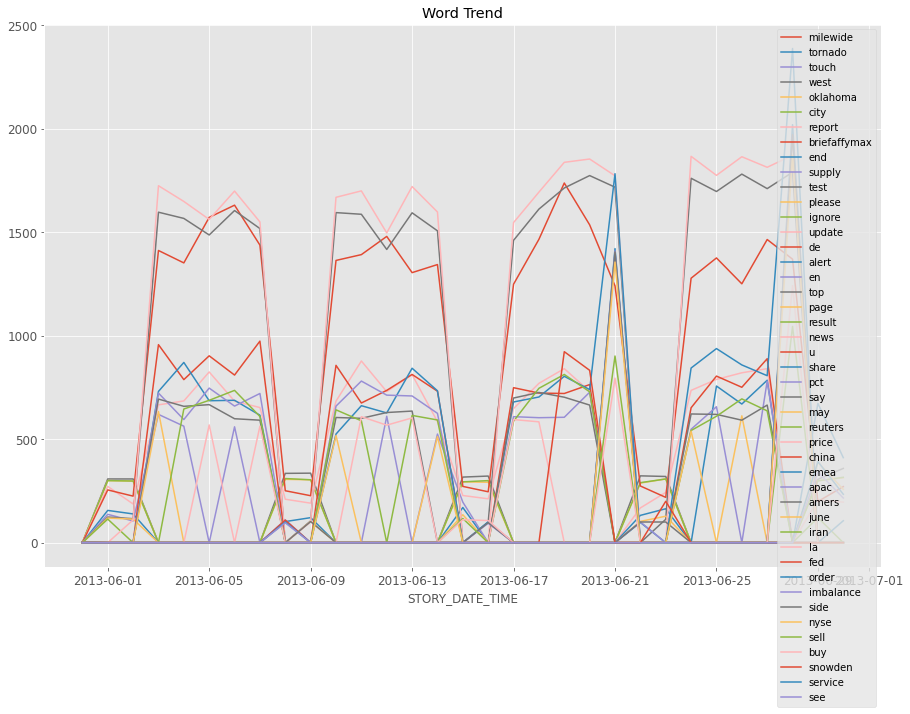

In [125]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.style.use('ggplot')
ax = text_df.plot(x=columns[0], y=columns[1:],kind='line', title ="Word Trend", figsize=(15, 10), legend=True, fontsize=12)
#ax.set_xlabel("Words", fontsize=12)
#ax.set_ylabel("Date", fontsize=12)
plt.show()

# #################################################################

In [132]:
from prophet import Prophet

In [133]:
col = text_df.columns
col_lst = list(col)

In [134]:
r, c = text_df.shape

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_se

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Usin

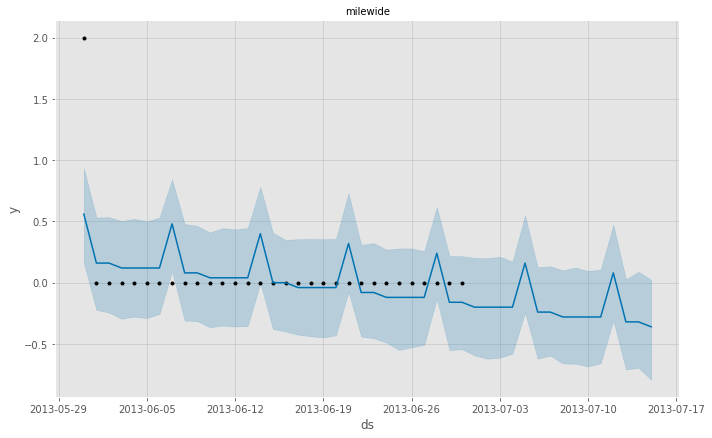

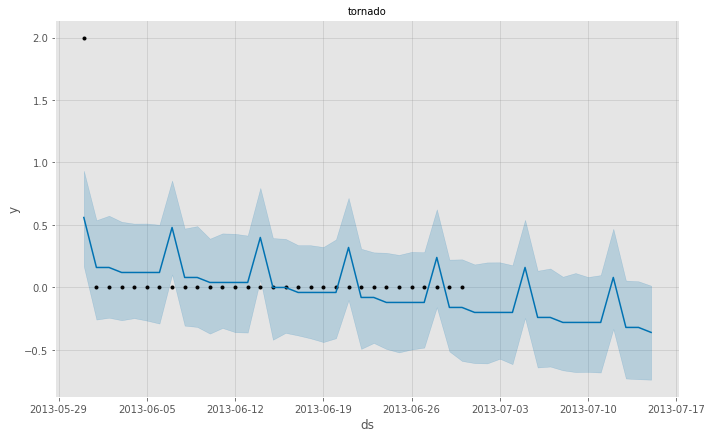

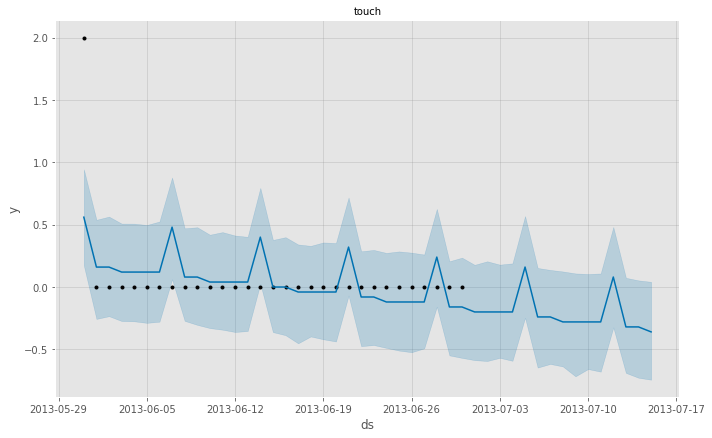

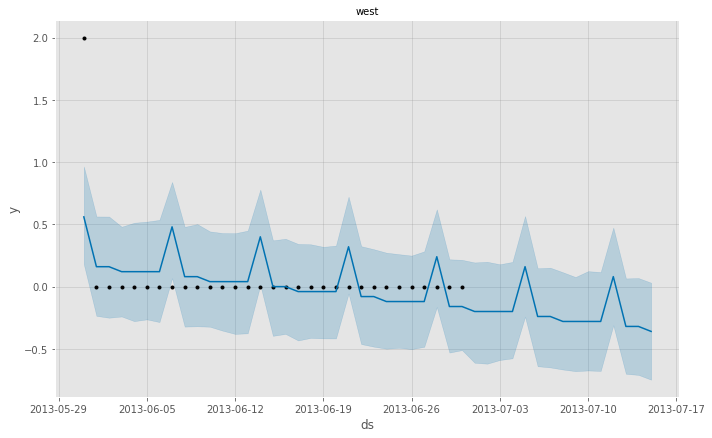

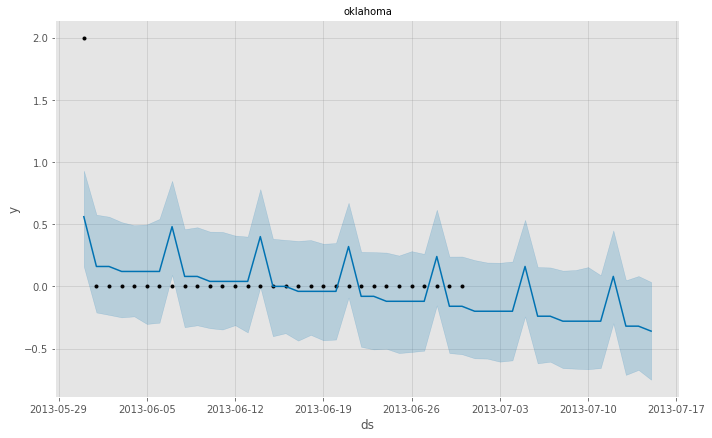

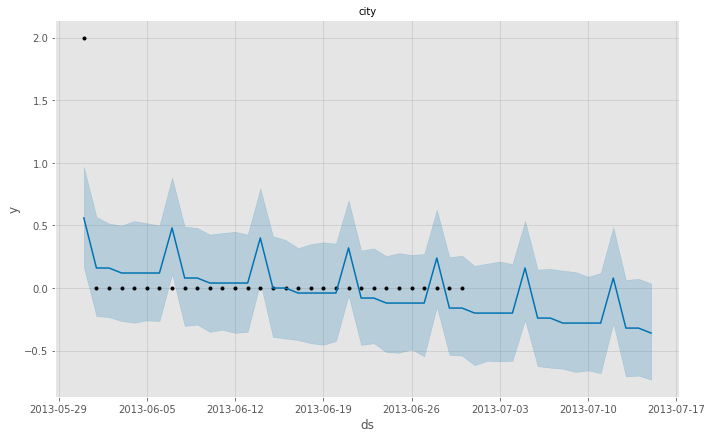

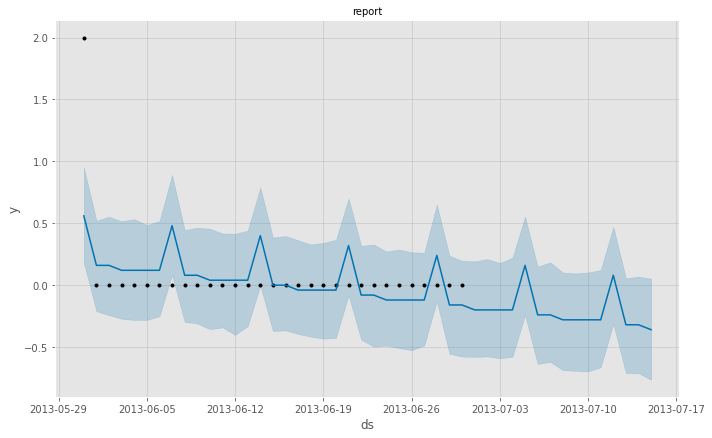

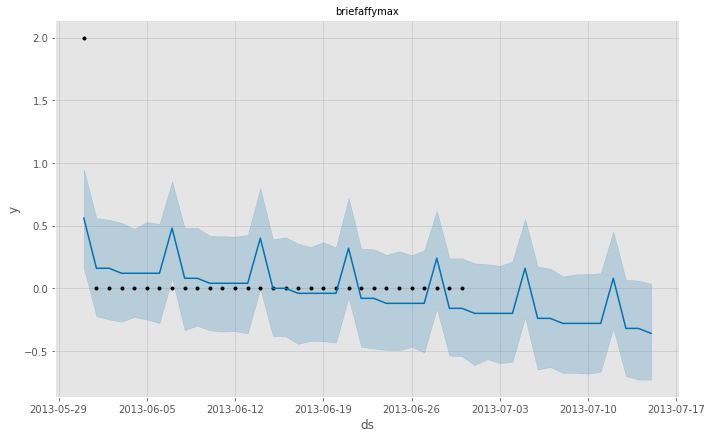

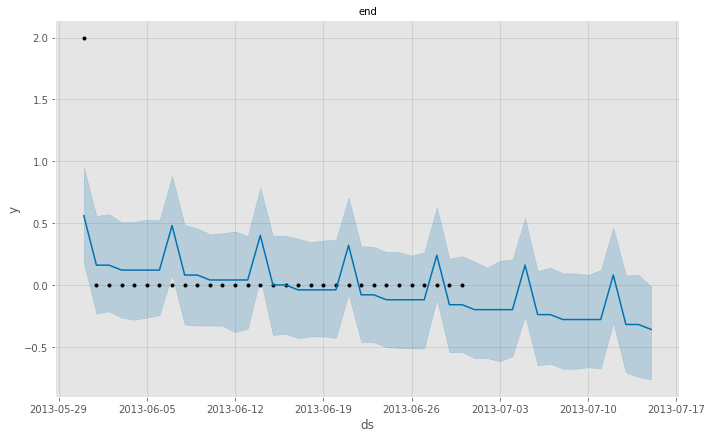

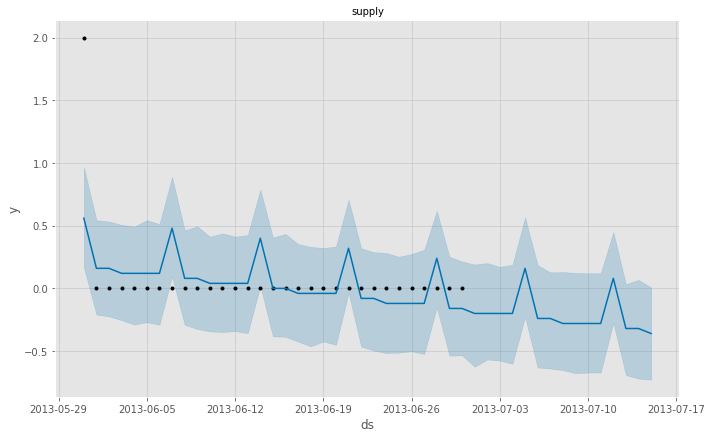

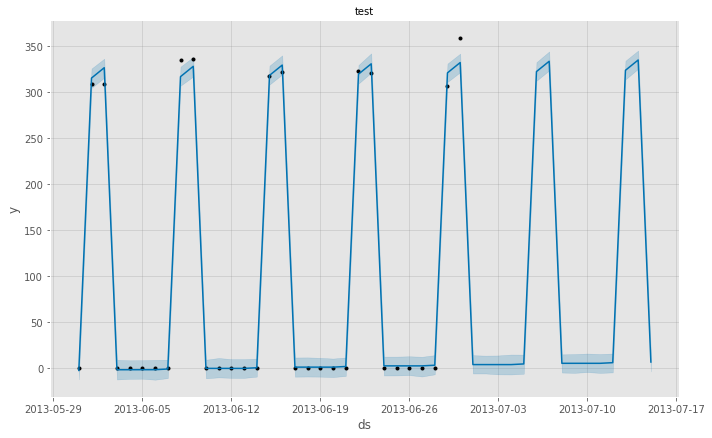

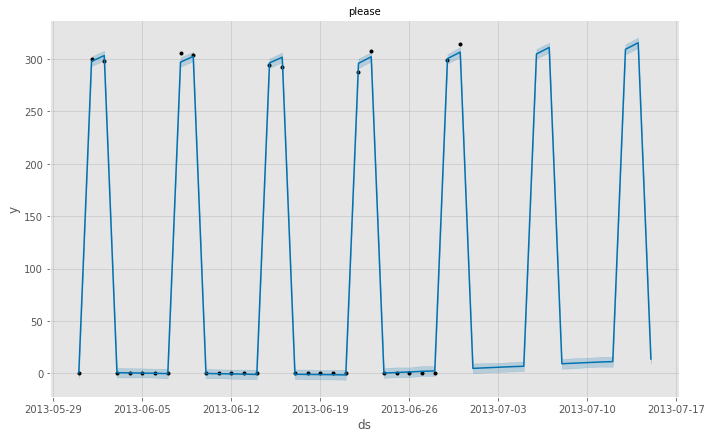

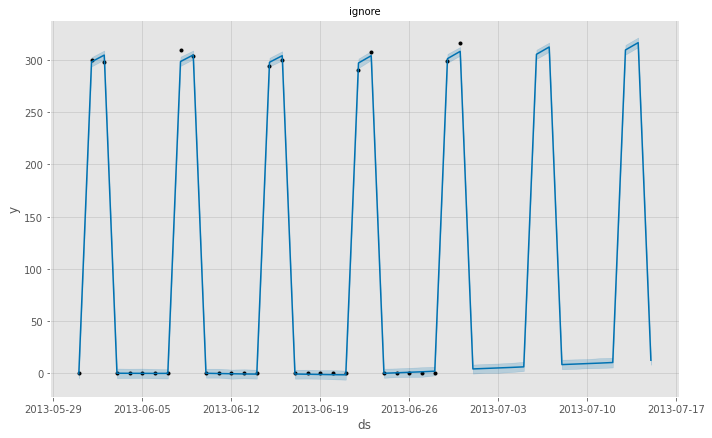

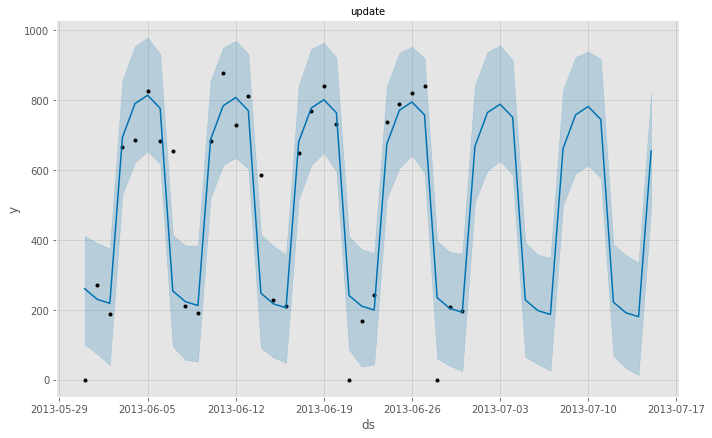

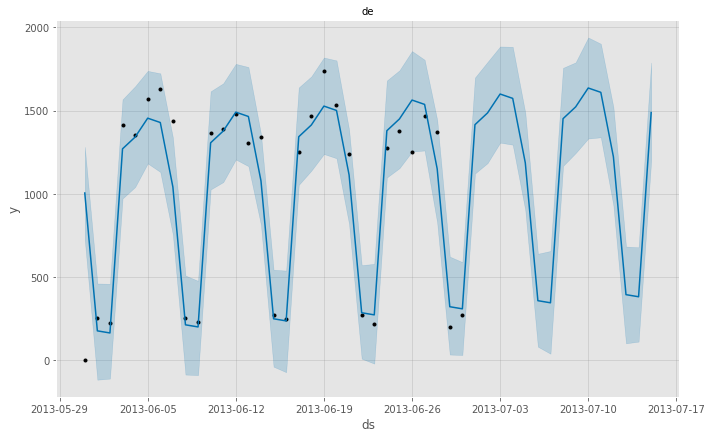

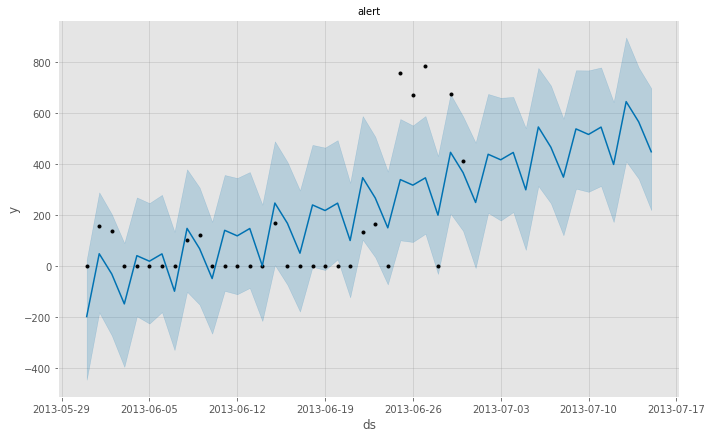

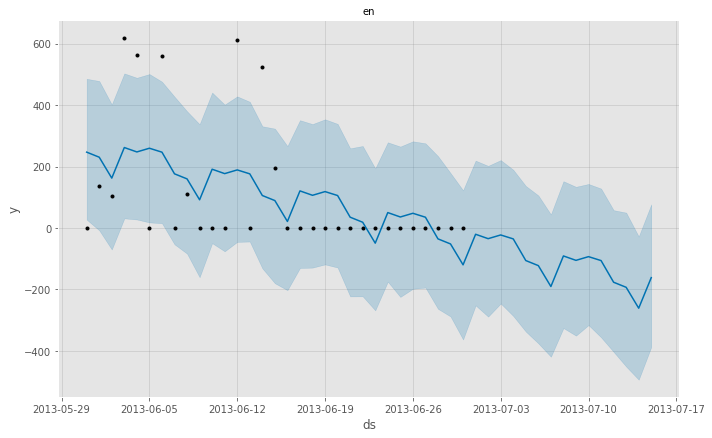

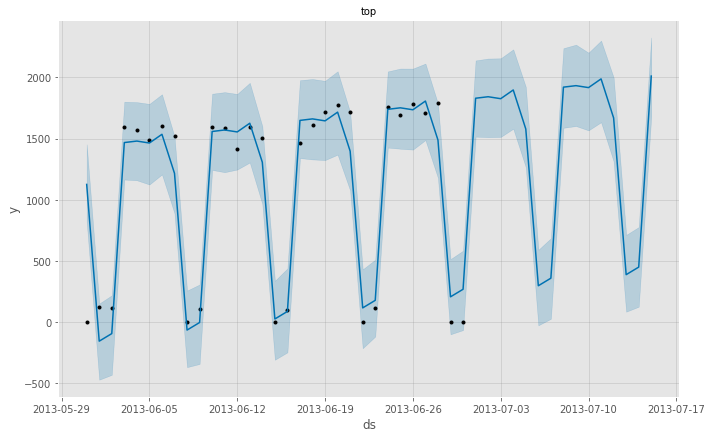

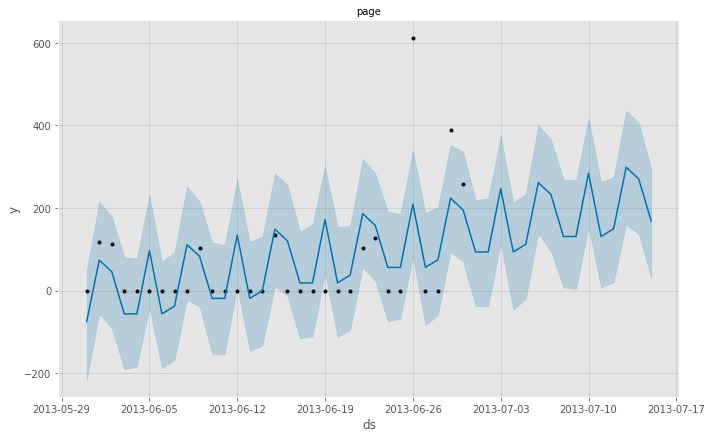

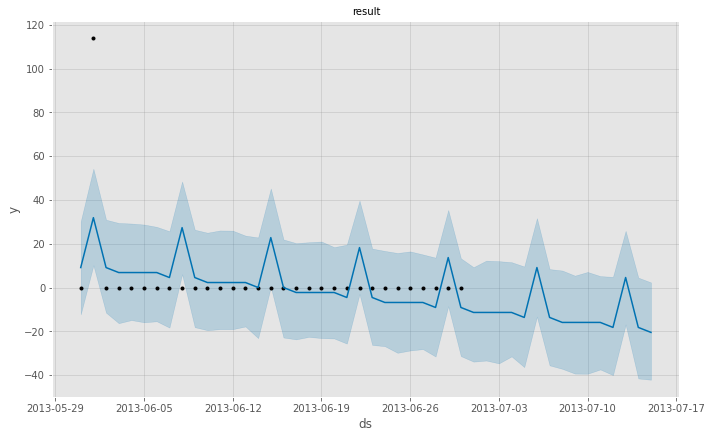

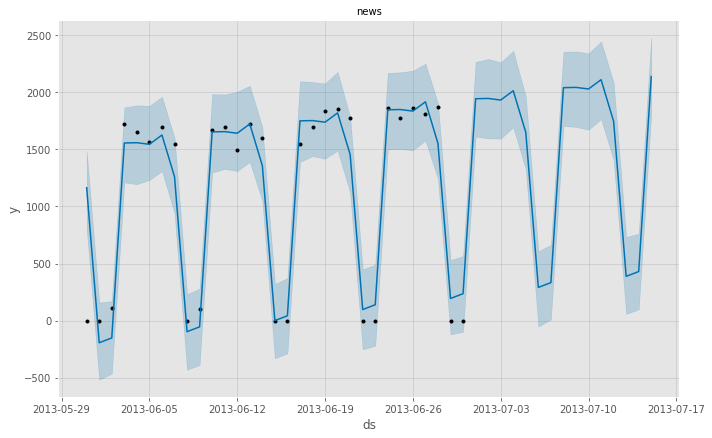

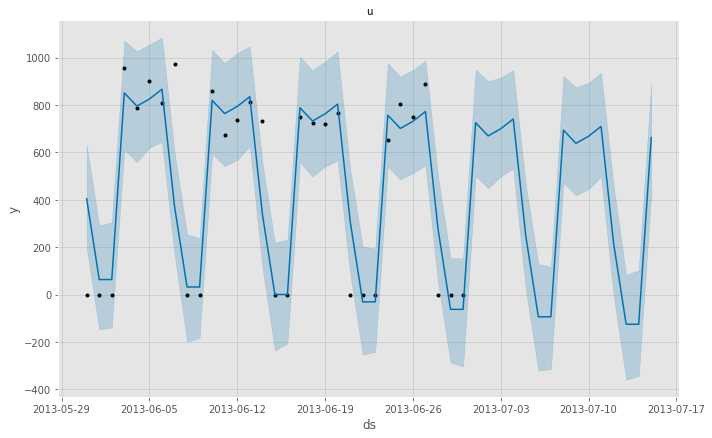

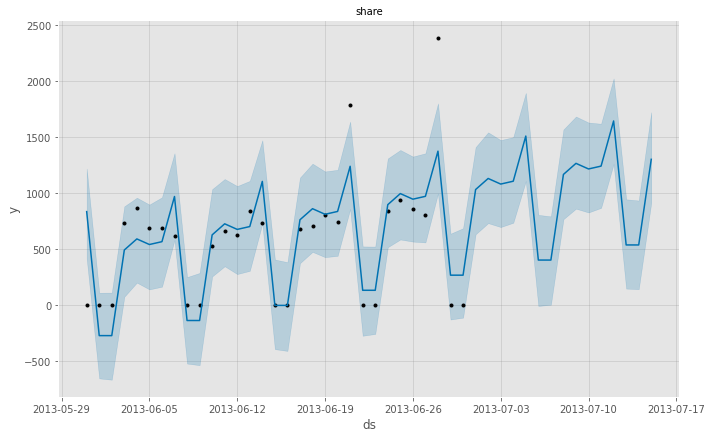

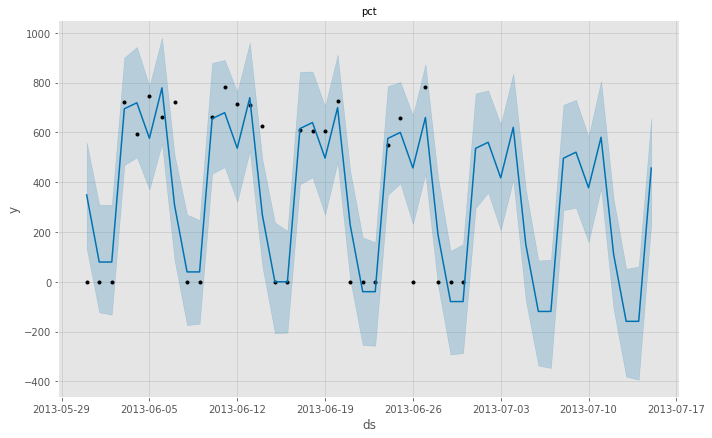

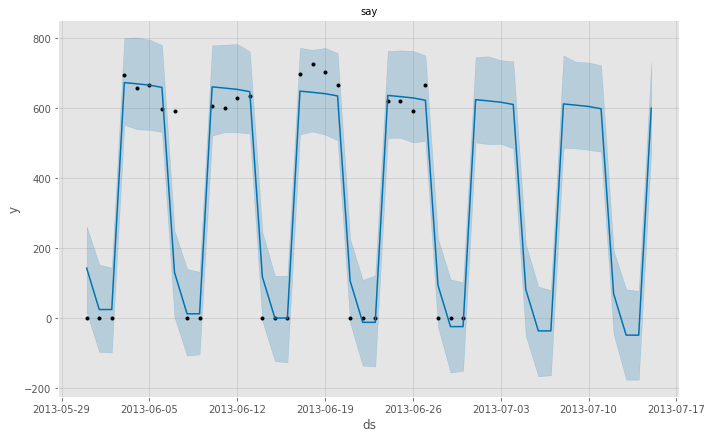

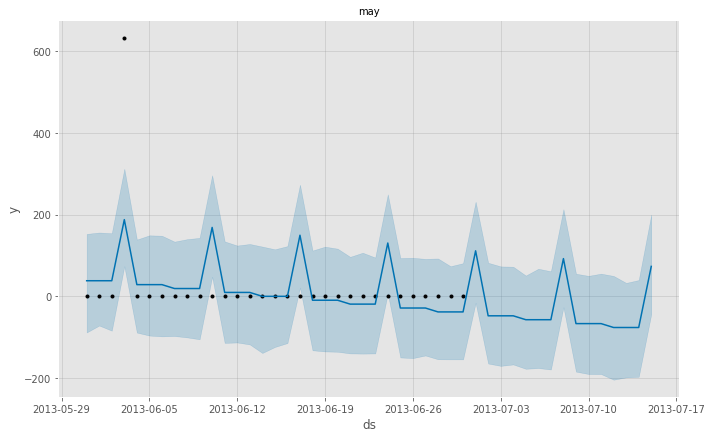

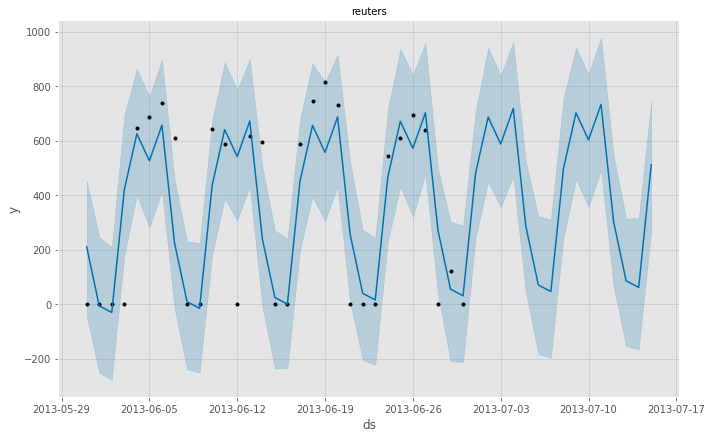

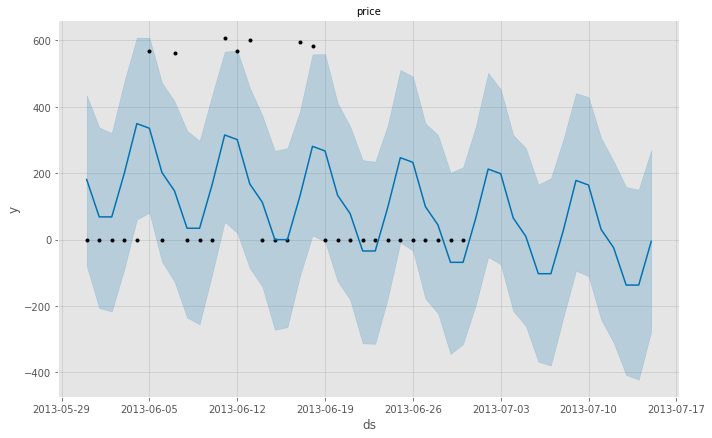

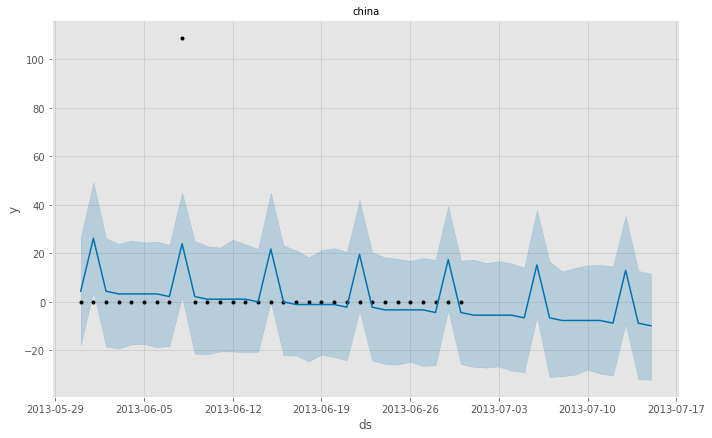

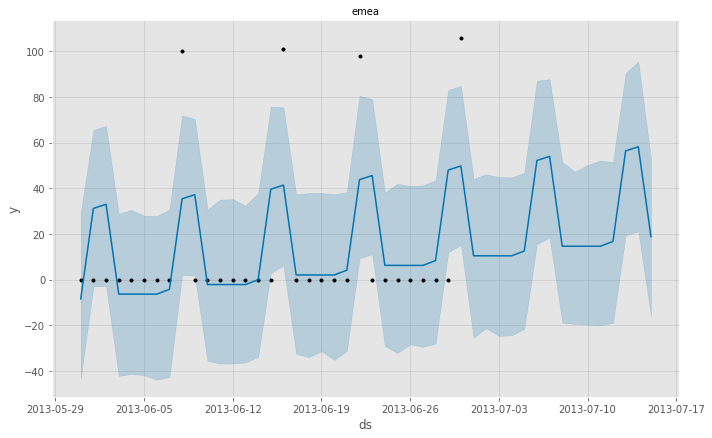

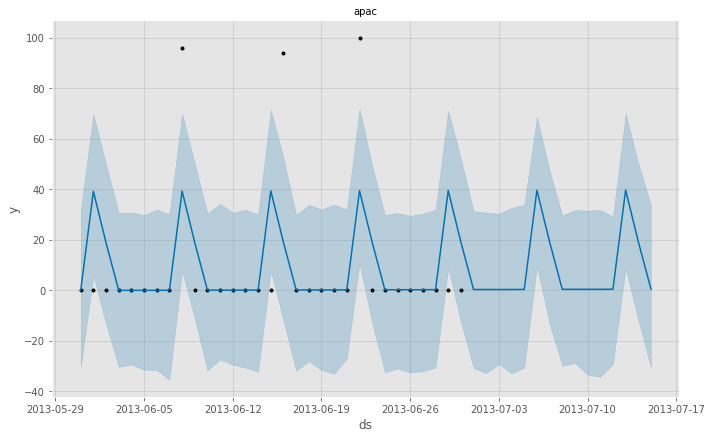

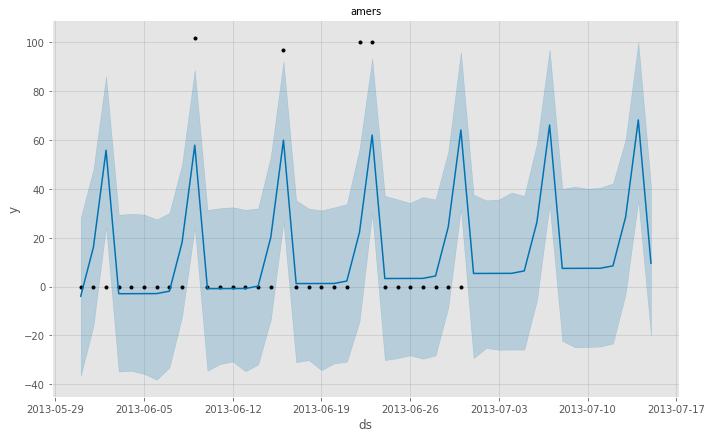

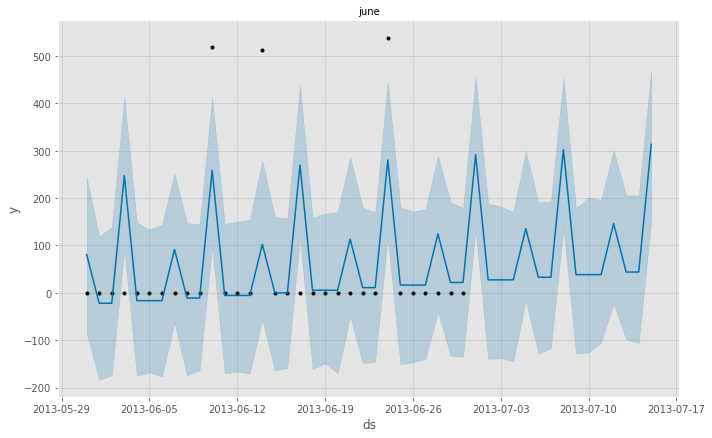

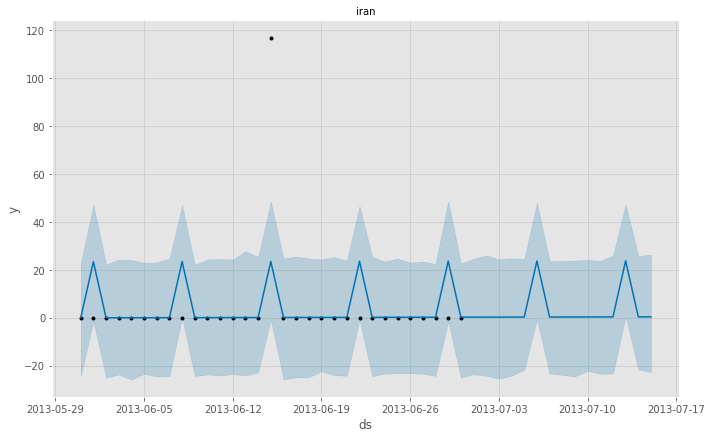

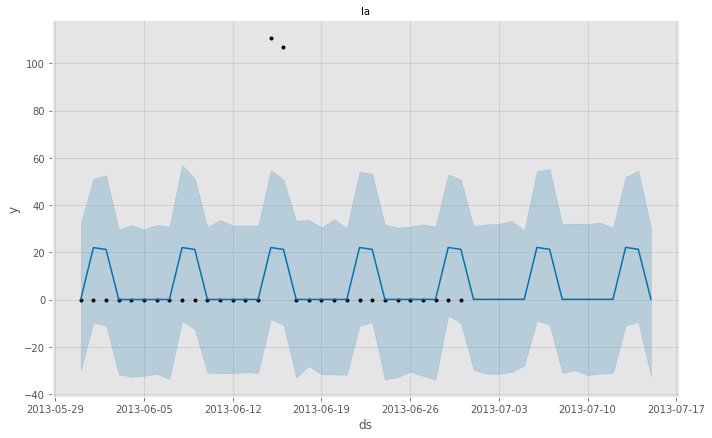

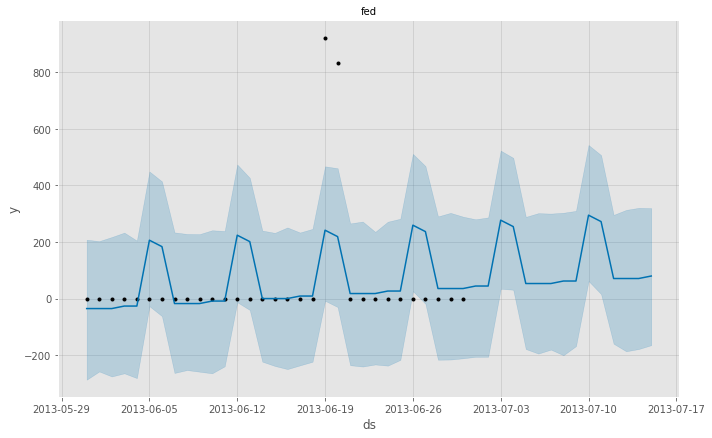

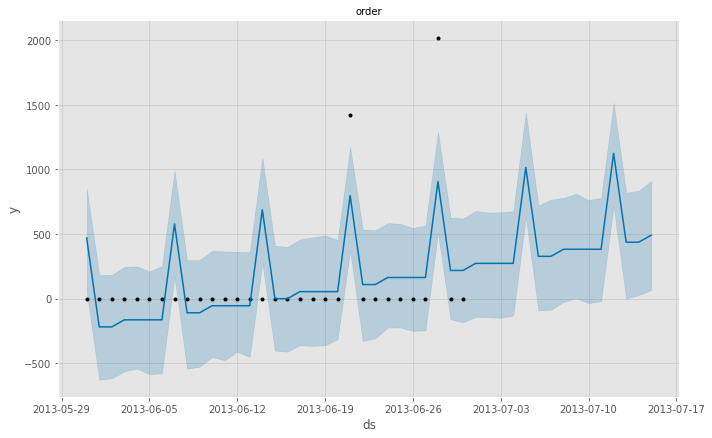

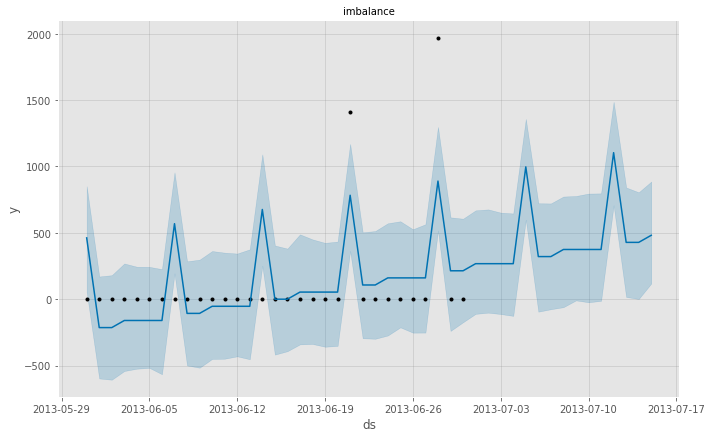

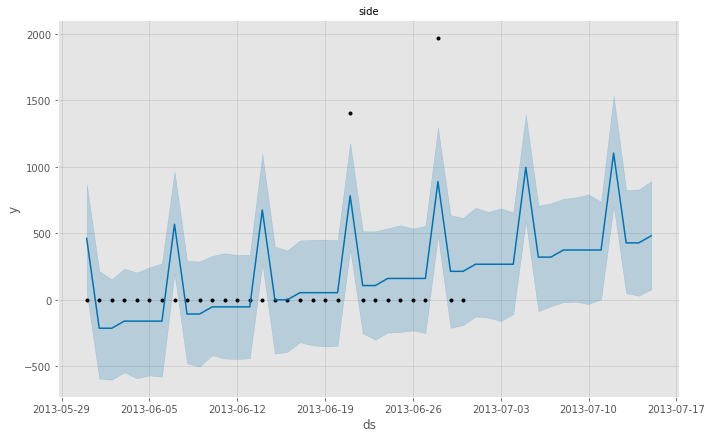

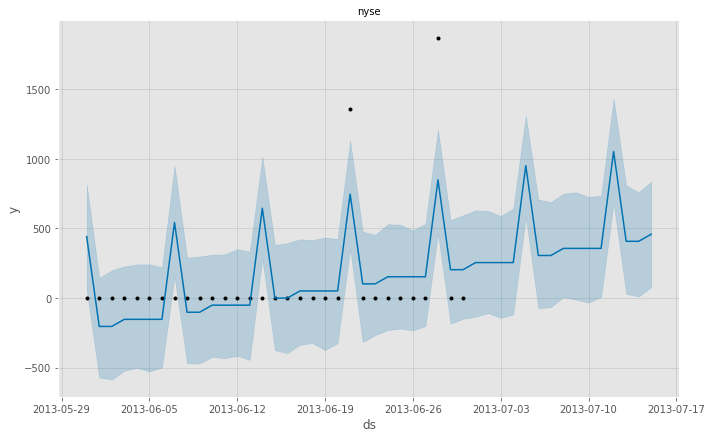

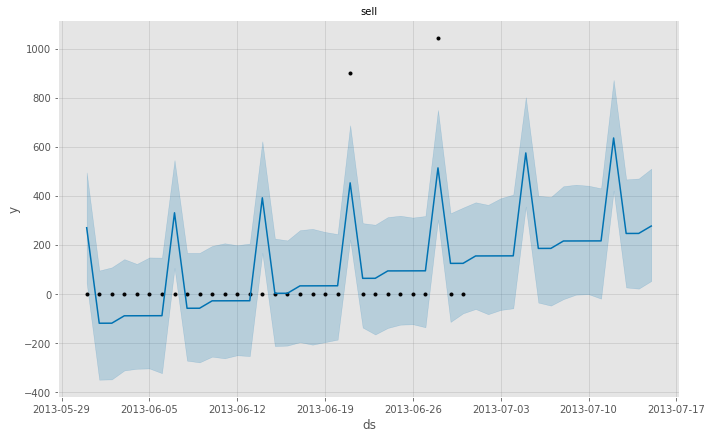

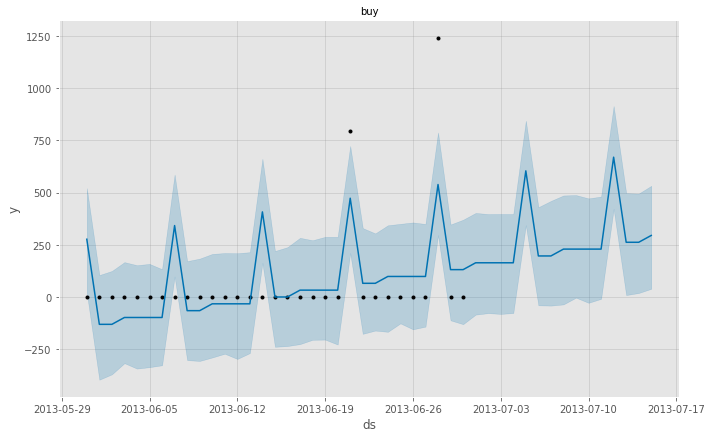

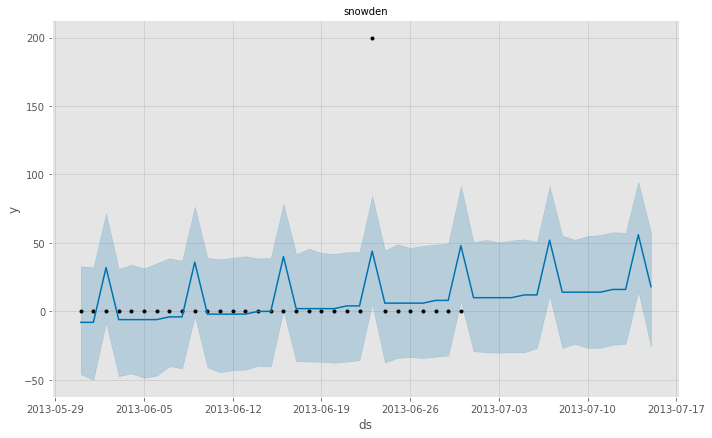

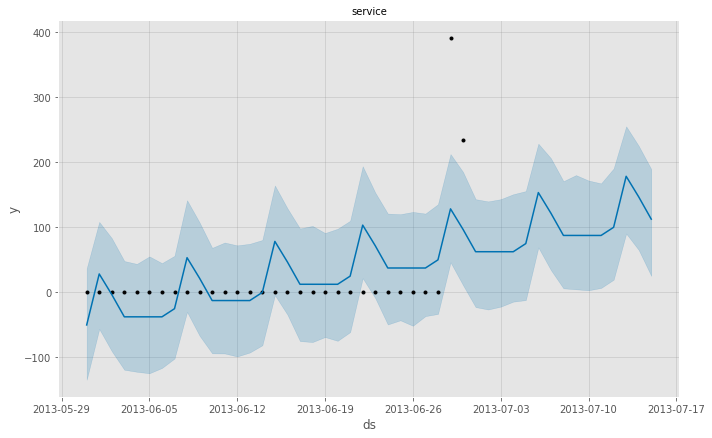

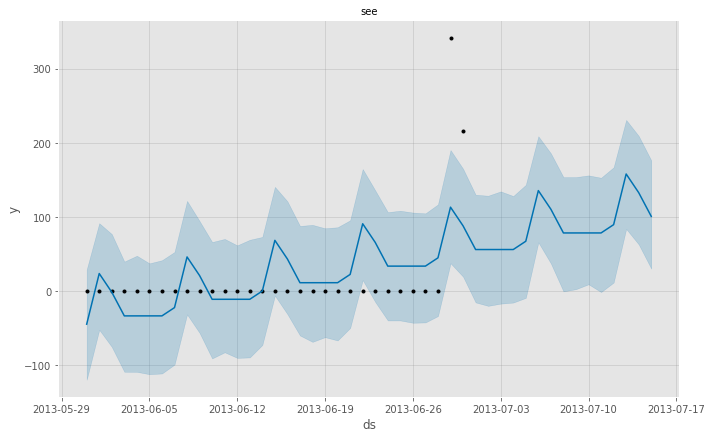

In [136]:
def train_and_forecast(col_index):
    data_sub_6 = text_df.rename(columns={"STORY_DATE_TIME": "ds", col_lst[col_index]: 'y'})
    m = Prophet()
    
    pred_model =m.fit(data_sub_6)
    future = m.make_future_dataframe(periods=15)
    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    fig = m.plot(forecast)
    ax = fig.gca()
    ax.set_title(col_lst[col_index], size=10)

for i in range(1,c):
    train_and_forecast(i)

# #################################################################

TIME SERIES MODEL

plotting series

In [126]:
word_df=text_df.iloc[:,1:]
word_col=word_df.columns
text_col=text_df.columns
text_col

Index(['STORY_DATE_TIME', 'milewide', 'tornado', 'touch', 'west', 'oklahoma',
       'city', 'report', 'briefaffymax', 'end', 'supply', 'test', 'please',
       'ignore', 'update', 'de', 'alert', 'en', 'top', 'page', 'result',
       'news', 'u', 'share', 'pct', 'say', 'may', 'reuters', 'price', 'china',
       'emea', 'apac', 'amers', 'june', 'iran', 'la', 'fed', 'order',
       'imbalance', 'side', 'nyse', 'sell', 'buy', 'snowden', 'service',
       'see'],
      dtype='object')

In [127]:
word_df.head(2)

,milewide,tornado,touch,west,oklahoma,city,report,briefaffymax,end,supply,...,fed,order,imbalance,side,nyse,sell,buy,snowden,service,see
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


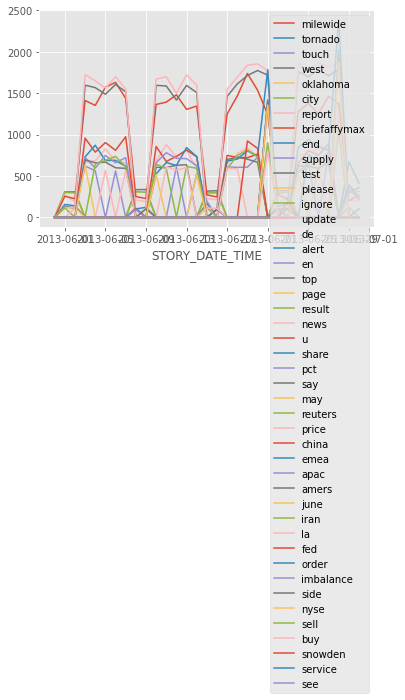

In [128]:
text_df.plot(x='STORY_DATE_TIME', y=word_col)
plt.show()

In [129]:
for col in word_col:
    df=text_df[['STORY_DATE_TIME',col]]
    df.columns = ['ds', 'y'] 
    n = NeuralProphet()
    model = n.fit(df, freq='D')
    future = n.make_future_dataframe(df, periods=1500)
    forecast = n.predict(future)
    plot = n.plot(forecast)
    plot.show()

NameError: name 'NeuralProphet' is not defined

In [ ]:
forecast.tail()

Prophet

In [130]:
from prophet import Prophet

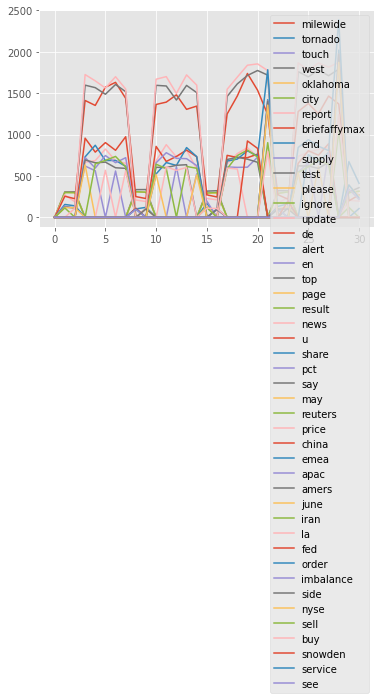

In [131]:
text_df.plot()
plt.show()

In [ ]:
for col in word_col:
    df=text_df[['STORY_DATE_TIME',col]]
    df.columns = ['ds', 'y'] 
    model = Prophet()
    model.fit(df)
    future = list()
    for i in range(1, 13):
        date = '1968-%02d' % i
        future.append([date])
    future = df(future)
    future.columns = ['ds']
    future['ds']= to_datetime(future['ds'])
    forecast = model.predict(future)
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
    model.plot(forecast)
    plt.show()

SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 

In [ ]:
data=text_df
data = data.set_index("STORY_DATE_TIME")
data.index.freq = 'MS'

In [ ]:
data.head(2)

In [ ]:
plt.figure(figsize=(18,9))
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

In [ ]:
for col in word_col:
    rcParams['figure.figsize'] = 12, 8
    a = seasonal_decompose(data[col], model = "add",period=2)
    a.plot();

Split of test and train data

In [ ]:
train_df = text_df.sort_values(by=['STORY_DATE_TIME']).copy()

In [ ]:
Features=word_col

In [ ]:
Features

In [ ]:
data = pd.DataFrame(train_df)
data_filtered = data[Features]

In [ ]:
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['sell']

In [ ]:
nrows = data_filtered.shape[0]
nrows

In [ ]:
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

In [ ]:
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

In [ ]:
sequence_length = 50

In [ ]:
index_Close = data.columns.get_loc("sell")

In [ ]:
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

In [ ]:
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

In [ ]:
train_data.shape

In [ ]:
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

In [ ]:
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

ARIMA/SARIMA

In [60]:
data=text_df

In [61]:
data['STORY_DATE_TIME'] = pd.to_datetime(data['STORY_DATE_TIME'])

In [62]:
data.dtypes

STORY_DATE_TIME    datetime64[ns]
milewide                  float64
tornado                   float64
touch                     float64
west                      float64
oklahoma                  float64
city                      float64
report                    float64
briefaffymax              float64
end                       float64
supply                    float64
test                      float64
please                    float64
ignore                    float64
update                    float64
de                        float64
alert                     float64
en                        float64
top                       float64
page                      float64
result                    float64
news                      float64
u                         float64
share                     float64
pct                       float64
say                       float64
may                       float64
reuters                   float64
price                     float64
china         

In [63]:
data.index = data['STORY_DATE_TIME']
data.drop(columns='STORY_DATE_TIME',inplace=True)
data.head()

,milewide,tornado,touch,west,oklahoma,city,report,briefaffymax,end,supply,...,fed,order,imbalance,side,nyse,sell,buy,snowden,service,see
STORY_DATE_TIME,,,,,,,,,,,,,,,,,,,,,
2013-05-31,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-06-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-06-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-06-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
data[['report']]

,report
STORY_DATE_TIME,
2013-05-31,2.0
2013-06-01,0.0
2013-06-02,0.0
2013-06-03,0.0
2013-06-04,0.0
2013-06-05,0.0
2013-06-06,0.0
2013-06-07,0.0
2013-06-08,0.0


In [71]:
model = ARIMA(data[['report']], order=(5,1,0))
model_fit = model.fit()

C:\Users\devel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\devel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\devel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [72]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 report   No. Observations:                   31
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -13117.201
Date:                Fri, 04 Nov 2022   AIC                          26246.402
Time:                        15:42:32   BIC                          26254.809
Sample:                    05-31-2013   HQIC                         26249.091
                         - 06-30-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       4.308e-07   1.49e-18   2.89e+11      0.000    4.31e-07    4.31e-07
ar.L2       2.154e-12   2.26e-22   9.52e+09      0.000    2.15e-12    2.15e-12
ar.L3       2.154e-12   7.55e-22   2.85e+09      0.000    2.15e-12    2.15e-12
ar.L4       2.154e-12   3.87e-21   5.56e+08      0.000    2.15e-12    2.15e-12
ar.L5       2.154e-12   6.99e-21   3.08e+08      0.000    2.15e-12    2.15e-12
sigma2         0.0002   1.14e-08   1.32e+04      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               918.58
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -5.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.12e+57. Standard errors may be unstable.
"""

In [73]:
data['forecast']=model_fit.predict(start=90,end=180,dynamic=True)
data['forecast']
#data[['milewide','forecast']].plot(figsize=(12,8))

C:\Users\devel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


STORY_DATE_TIME
2013-05-31   NaN
2013-06-01   NaN
2013-06-02   NaN
2013-06-03   NaN
2013-06-04   NaN
2013-06-05   NaN
2013-06-06   NaN
2013-06-07   NaN
2013-06-08   NaN
2013-06-09   NaN
2013-06-10   NaN
2013-06-11   NaN
2013-06-12   NaN
2013-06-13   NaN
2013-06-14   NaN
2013-06-15   NaN
2013-06-16   NaN
2013-06-17   NaN
2013-06-18   NaN
2013-06-19   NaN
2013-06-20   NaN
2013-06-21   NaN
2013-06-22   NaN
2013-06-23   NaN
2013-06-24   NaN
2013-06-25   NaN
2013-06-26   NaN
2013-06-27   NaN
2013-06-28   NaN
2013-06-29   NaN
2013-06-30   NaN
Name: forecast, dtype: float64

ARIMA latest

In [74]:
X = data.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history[0], order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    


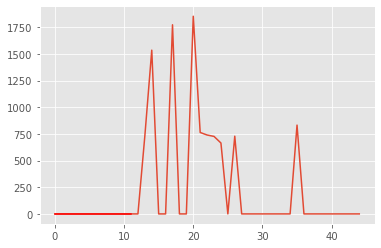

In [75]:
model = ARIMA(history[0], order=(5,1,0))
model_fit = model.fit()
output = model_fit.forecast()
yhat = output[0]
predictions.append(yhat)
obs = test[0]
history.append(obs)
plt.plot(test[0])
plt.plot(predictions, color='red')
plt.show()

In [76]:
output

array([5.04766276e-99])

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


In [79]:
len(history)

32